In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import keras

In [3]:
data=pd.read_csv("C:\\Users\\Sathya Sai\\Downloads\\Churn_Modelling.csv")

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
ans=pd.get_dummies(data["Geography"],drop_first=True)

In [17]:
ans=pd.concat([ans,pd.get_dummies(data["Gender"],drop_first=True)],axis=1)

In [18]:
data.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [24]:
data.drop(["Geography","Gender"],axis=1,inplace=True)

In [19]:
data=pd.concat([data,ans],axis=1)

In [13]:
from sklearn.compose import ColumnTransformer

In [37]:
trans=ColumnTransformer([
    ("Scaling",StandardScaler(),['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary'])
],remainder='passthrough')

In [21]:
from sklearn.preprocessing import StandardScaler

In [25]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Germany', 'Spain',
       'Male'],
      dtype='object')

In [29]:
y=data[["Exited"]]

In [30]:
x=data.drop("Exited",axis=1)

In [33]:
from sklearn.model_selection import train_test_split

In [38]:
temp=trans.fit_transform(x)

In [46]:
x=pd.DataFrame(temp,columns=x.columns)

In [48]:
train_x,train_y,test_x,test_y=train_test_split(x,y,test_size=0.2,random_state=0)

In [93]:
test_y.shape

(2000, 1)

In [52]:
classifier=keras.Sequential()

In [129]:
classifier.add(keras.layers.Dense(units= 10, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
classifier.add(keras.layers.Dropout(0.3))
# Adding the second hidden layer
classifier.add(keras.layers.Dense(units = 15, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(keras.layers.Dropout(0.3))
# Adding the output layer
classifier.add(keras.layers.Dense(units = 1,kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(train_x,test_x,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 4s 3ms/step - loss: 0.5861 - accuracy: 0.8084 - val_loss: 0.4839 - val_accuracy: 0.8425
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4576 - accuracy: 0.8261 - val_loss: 0.4183 - val_accuracy: 0.8448
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4169 - accuracy: 0.8300 - val_loss: 0.4001 - val_accuracy: 0.8402
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4132 - accuracy: 0.8319 - val_loss: 0.3923 - val_accuracy: 0.8444
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4094 - accuracy: 0.8330 - val_loss: 0.3939 - val_accuracy: 0.8300
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3955 - accuracy: 0.8423 - val_loss: 0.3889 - val_accuracy: 0.8406
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3932 - accuracy: 0.8412 - val_loss: 0.3865 - val_accuracy: 0.8497

Epoch 58/100
536/536 [==============================] - 2s 5ms/step - loss: 0.3622 - accuracy: 0.8593 - val_loss: 0.3799 - val_accuracy: 0.8421
Epoch 59/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3635 - accuracy: 0.8563 - val_loss: 0.3834 - val_accuracy: 0.8527
Epoch 60/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3624 - accuracy: 0.8552 - val_loss: 0.3795 - val_accuracy: 0.8535
Epoch 61/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3678 - accuracy: 0.8545 - val_loss: 0.3825 - val_accuracy: 0.8406
Epoch 62/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3659 - accuracy: 0.8548 - val_loss: 0.3807 - val_accuracy: 0.8512
Epoch 63/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3616 - accuracy: 0.8580 - val_loss: 0.3794 - val_accuracy: 0.8436
Epoch 64/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3650 - accuracy: 0.8567 - val_loss: 0.3788 - val_accuracy:

In [130]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


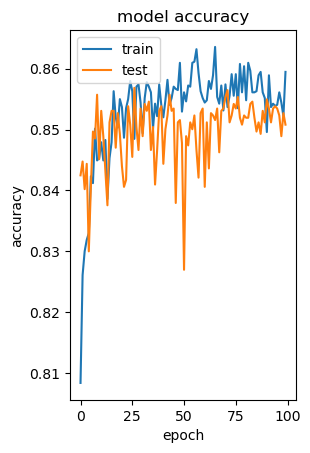

In [131]:
# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

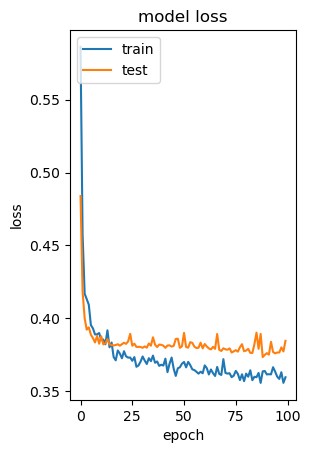

In [132]:
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [133]:
# Predicting the Test set results
y_pred = classifier.predict(train_y)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 1s 3ms/step


In [134]:
test_y.shape

(2000, 1)

In [135]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(test_y,y_pred)

In [136]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [137]:
print("f1_score : {}".format(f1_score(test_y,y_pred)))
print("precision_score : {}".format(precision_score(test_y,y_pred)))
print("recall_score : {}".format(recall_score(test_y,y_pred)))
print("roc_auc_score : {}".format(roc_auc_score(test_y,y_pred)))

f1_score : 0.5811688311688311
precision_score : 0.8483412322274881
recall_score : 0.4419753086419753
roc_auc_score : 0.7109563063586053


In [138]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1595
           1       0.85      0.44      0.58       405

    accuracy                           0.87      2000
   macro avg       0.86      0.71      0.75      2000
weighted avg       0.87      0.87      0.85      2000



In [147]:
cm

array([[1563,   32],
       [ 226,  179]], dtype=int64)

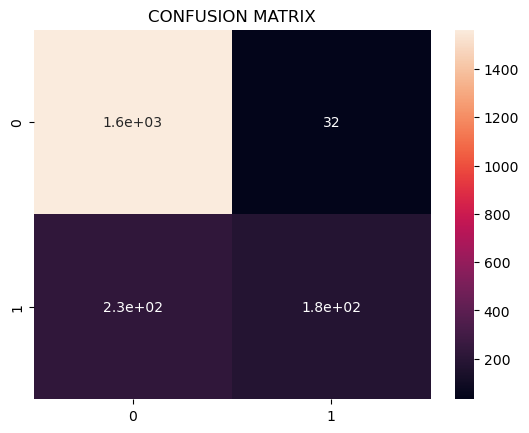

In [151]:
sns.heatmap(cm,annot=True)
plt.title('CONFUSION MATRIX')
plt.show()